**Assignment 9**


**Name : Shruthi Ramu**


**ID : 029368922**

**(a) Implement a function to generate all pairs of query and answer.**

In [10]:
# Implement a function to generate all pairs of query and answer with sum and difference

from random import seed
from random import randint
from math import ceil
from math import log10
 
# generate lists of integers and their sum/difference
def random_sum_pairs(n_examples, n_numbers, largest):
    X, y = list(), list()
    for i in range(n_examples):
        in_pattern = [randint(0,largest) for _ in range(n_numbers)]
        in_pattern_diff = in_pattern
        out_pattern_diff = in_pattern
        out_pattern_sum = sum(in_pattern)
        for first, second in zip(in_pattern_diff, in_pattern_diff[1:]):
            out_pattern_diff = first - second
        X.append(in_pattern)
        X.append(in_pattern_diff)
        y.append(out_pattern_sum)
        y.append(out_pattern_diff)
    return X, y
 
# convert data to strings
def to_string(X, y, n_numbers, largest):
    max_length = 5
    Xstr = list()
    for i in range(len(X)):
        if i%2 == 0:
            strp = '+'.join([str(n) for n in X[i]])
            strp = ''.join([' ' for _ in range(max_length-len(strp))]) + strp
            Xstr.append(strp)
        else :
            strp = '-'.join([str(n) for n in X[i]])
            strp = ''.join([' ' for _ in range(max_length-len(strp))]) + strp
            Xstr.append(strp)
    max_length = 4
    ystr = list()
    for pattern in y:
        strp = str(pattern)
        strp = ''.join([' ' for _ in range(max_length-len(strp))]) + strp
        ystr.append(strp)
    return Xstr, ystr
 
seed(1)
n_samples = 10000
n_numbers = 2
largest = 99
# generate pairs
X, y = random_sum_pairs(n_samples, n_numbers, largest)
# print("Size of input = ", len(X))
# print("Size of output = ", len(y))
# [print(list1,list2) for list1,list2 in zip(X, y)]


# convert to strings
X, y = to_string(X, y, n_numbers, largest)
print("\n\n-------------In string Format-----------")

for i in range(len(X)):
    print(X[i] + '\t ' + y[i])

Streaming output truncated to the last 5000 lines.
 2+32	   34
 2-32	  -30
28+73	  101
28-73	  -45
94+72	  166
94-72	   22
24+86	  110
24-86	  -62
 9+44	   53
 9-44	  -35
52+44	   96
52-44	    8
94+63	  157
94-63	   31
49+65	  114
49-65	  -16
24+34	   58
24-34	  -10
92+70	  162
92-70	   22
24+92	  116
24-92	  -68
52+30	   82
52-30	   22
48+27	   75
48-27	   21
12+41	   53
12-41	  -29
21+51	   72
21-51	  -30
86+30	  116
86-30	   56
40+69	  109
40-69	  -29
 47+4	   51
 47-4	   43
26+20	   46
26-20	    6
41+38	   79
41-38	    3
79+58	  137
79-58	   21
 12+1	   13
 12-1	   11
23+96	  119
23-96	  -73
91+69	  160
91-69	   22
47+25	   72
47-25	   22
20+35	   55
20-35	  -15
99+20	  119
99-20	   79
14+24	   38
14-24	  -10
48+71	  119
48-71	  -23
55+39	   94
55-39	   16
 26+8	   34
 26-8	   18
36+63	   99
36-63	  -27
64+59	  123
64-59	    5
29+79	  108
29-79	  -50
 92+6	   98
 92-6	   86
33+41	   74
33-41	   -8
50+73	  123
50-73	  -23
94+19	  113
94-19	   75
83+43	  126
83-43	   40
42+57	   99
4

**(b) Implement a function to encode a string into one-hot-encoding scheme**

In [15]:
# Implement a function to encode a string into one-hot-encoding scheme.
from random import seed
from random import randint
from math import ceil
from math import log10
 
# generate lists of integers and their sum, difference
def random_sum_pairs(n_examples, n_numbers, largest):
    X, y = list(), list()
    for i in range(n_examples):
        in_pattern = [randint(0,largest) for _ in range(n_numbers)]
        in_pattern_diff = in_pattern
        out_pattern_diff = in_pattern
        out_pattern_sum = sum(in_pattern)
        for first, second in zip(in_pattern_diff, in_pattern_diff[1:]):
            out_pattern_diff = first - second
        X.append(in_pattern)
        X.append(in_pattern_diff)
        y.append(out_pattern_sum)
        y.append(out_pattern_diff)
    return X, y
 
# convert data to strings
def to_string(X, y, n_numbers, largest):
  # lengths of queries and answers are fixed as 5 and 4, respectively
    max_length = 5
    Xstr = list()
    for i in range(len(X)):
        if i%2 == 0:
            strp = '+'.join([str(n) for n in X[i]])
            strp = ''.join([' ' for _ in range(max_length-len(strp))]) + strp
            Xstr.append(strp)
        else :
            strp = '-'.join([str(n) for n in X[i]])
            strp = ''.join([' ' for _ in range(max_length-len(strp))]) + strp
            Xstr.append(strp)
    max_length = 4
    ystr = list()
    for pattern in y:
        strp = str(pattern)
        strp = ''.join([' ' for _ in range(max_length-len(strp))]) + strp
        ystr.append(strp)
    return Xstr, ystr
 

# integer encode strings
def integer_encode(X, y, alphabet):
	char_to_int = dict((c, i) for i, c in enumerate(alphabet))
	Xenc = list()
	for pattern in X:
		integer_encoded = [char_to_int[char] for char in pattern]
		Xenc.append(integer_encoded)
	yenc = list()
	for pattern in y:
		integer_encoded = [char_to_int[char] for char in pattern]
		yenc.append(integer_encoded)
	return Xenc, yenc
 
# one hot encode
def one_hot_encode(X, y, max_int):
	Xenc = list()
	for seq in X:
		pattern = list()
		for index in seq:
			vector = [0 for _ in range(max_int)]
			vector[index] = 1
			pattern.append(vector)
		Xenc.append(pattern)
	yenc = list()
	for seq in y:
		pattern = list()
		for index in seq:
			vector = [0 for _ in range(max_int)]
			vector[index] = 1
			pattern.append(vector)
		yenc.append(pattern)
	return Xenc, yenc
 
seed(1)
n_samples = 10000
n_numbers = 2
largest = 99
# generate pairs
X, y = random_sum_pairs(n_samples, n_numbers, largest)


# convert to strings
X, y = to_string(X, y, n_numbers, largest)


# integer encode
alphabet = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '-', ' ']
X, y = integer_encode(X, y, alphabet)
print("------------------------Integer EnCode------------------------------------")
print("Size of input = ", len(X))
print("Size of input = ", len(y))

print(X[:10])

# one hot encode
X, y = one_hot_encode(X, y, len(alphabet))
print("-------------------------------One Hot Code ------------------------------------")
print("Size of input = ", len(X))
print("Size of input = ", len(y))

print(X[:10])

------------------------Integer EnCode------------------------------------
Size of input =  20000
Size of input =  20000
[[1, 7, 10, 7, 2], [1, 7, 11, 7, 2], [12, 9, 7, 10, 8], [12, 9, 7, 11, 8], [3, 2, 10, 1, 5], [3, 2, 11, 1, 5], [6, 3, 10, 9, 7], [6, 3, 11, 9, 7], [5, 7, 10, 6, 0], [5, 7, 11, 6, 0]]
-------------------------------One Hot Code ------------------------------------
Size of input =  20000
Size of input =  20000
[[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**(c) Implement a Encoder-Decoder LSTM network using the following code. Explain how this code implements Encoder-Decoder scheme.**


The Encoder-Decoder LSTM is a recurrent neural network designed to address sequence-to-sequence problems, sometimes called seq2seq.

Sequence-to-sequence prediction problems are challenging because the number of items in the input and output sequences can vary. For example, text translation and learning to execute programs are examples of seq2seq problems.

One approach to seq2seq prediction problems that has proven very effective is called the Encoder-Decoder LSTM.

This architecture is comprised of two models: one for reading the input sequence and encoding it into a fixed-length vector, and a second for decoding the fixed-length vector and outputting the predicted sequence. The use of the models in concert gives the architecture its name of Encoder-Decoder LSTM designed specifically for seq2seq problems.

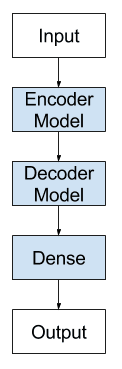

We can think of the model as being comprised of two key parts: the encoder and the decoder.

First, the input sequence is shown to the network one encoded character at a time. We need an encoding level to learn the relationship between the steps in the input sequence and develop an internal representation of these relationships.

One or more LSTM layers can be used to implement the encoder model. The output of this model is a fixed-size vector that represents the internal representation of the input sequence. The number of memory cells in this layer defines the length of this fixed-sized vector.



```
model = Sequential()
model.add(LSTM(..., input_shape=(...)))
```

The decoder must transform the learned internal representation of the input sequence into the correct output sequence.

One or more LSTM layers can also be used to implement the decoder model. This model reads from the fixed sized output from the encoder model.

```
model.add(LSTM(..., return_sequences=True))
model.add(TimeDistributed(Dense(...)))
```
The RepeatVector layer can be used like an adapter to fit the encoder and decoder parts of the network together. We can configure the RepeatVector to repeat the fixed length vector one time for each time step in the output sequence.

```
model.add(RepeatVector(...))
```

To summarize, the RepeatVector is used as an adapter to fit the fixed-sized 2D output of the encoder to the differing length and 3D input expected by the decoder. The TimeDistributed wrapper allows the same output layer to be reused for each element in the output sequence.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                19968     
                                                                 
 repeat_vector (RepeatVector  (None, 4, 64)            0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 4, 64)             33024     
                                                                 
 dense (Dense)               (None, 4, 13)             845       
                                                                 
Total params: 53,837
Trainable params: 53,837
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
2000/2000 [==============================] - 18s 7ms/step - loss: 1.2889 - accuracy: 0.5103
Epoch 2/30

dict_keys(['loss', 'accuracy'])


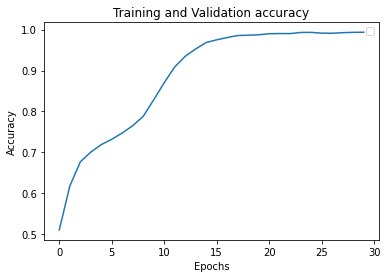

Expected= 108, Predicted= 108
Expected=   4, Predicted=   4
Expected= 120, Predicted= 120
Expected= -14, Predicted= -14
Expected= 102, Predicted= 102
Expected= -90, Predicted= -90
Expected= 101, Predicted= 101
Expected=  53, Predicted=  53
Expected= 161, Predicted= 161
Expected=  17, Predicted=  17
Expected=  98, Predicted=  98
Expected=  60, Predicted=  60
Expected=  54, Predicted=  54
Expected=  46, Predicted=  46
Expected=  59, Predicted=  59
Expected=  45, Predicted=  45
Expected= 107, Predicted= 107
Expected= -75, Predicted= -75
Expected= 127, Predicted= 127
Expected=  23, Predicted=  23


In [16]:
# Implement a Encoder-Decoder LSTM network using the following code

from random import seed
from random import randint
from numpy import array
from math import ceil
from math import log10
from math import sqrt
from numpy import argmax
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
import matplotlib.pyplot as plt
%matplotlib inline
 
# generate lists of integers and their sum/difference
def random_sum_pairs(n_examples, n_numbers, largest):
    X, y = list(), list()
    for i in range(n_examples):
        in_pattern = [randint(0,largest) for _ in range(n_numbers)]
        in_pattern_diff = in_pattern
        out_pattern_diff = in_pattern
        out_pattern_sum = sum(in_pattern)
        for first, second in zip(in_pattern_diff, in_pattern_diff[1:]):
            out_pattern_diff = first - second
        X.append(in_pattern)
        X.append(in_pattern_diff)
        y.append(out_pattern_sum)
        y.append(out_pattern_diff)
    return X, y
 
# convert data to strings
def to_string(X, y, n_numbers, largest):
    max_length = 5
    Xstr = list()
    for i in range(len(X)):
        if i%2 == 0:
            strp = '+'.join([str(n) for n in X[i]])
            strp = ''.join([' ' for _ in range(max_length-len(strp))]) + strp
            Xstr.append(strp)
        else :
            strp = '-'.join([str(n) for n in X[i]])
            strp = ''.join([' ' for _ in range(max_length-len(strp))]) + strp
            Xstr.append(strp)
    max_length = 4
    ystr = list()
    for pattern in y:
        strp = str(pattern)
        strp = ''.join([' ' for _ in range(max_length-len(strp))]) + strp
        ystr.append(strp)
    return Xstr, ystr
 

# integer encode strings
def integer_encode(X, y, alphabet):
	char_to_int = dict((c, i) for i, c in enumerate(alphabet))
	Xenc = list()
	for pattern in X:
		integer_encoded = [char_to_int[char] for char in pattern]
		Xenc.append(integer_encoded)
	yenc = list()
	for pattern in y:
		integer_encoded = [char_to_int[char] for char in pattern]
		yenc.append(integer_encoded)
	return Xenc, yenc
 
# one hot encode
def one_hot_encode(X, y, max_int):
	Xenc = list()
	for seq in X:
		pattern = list()
		for index in seq:
			vector = [0 for _ in range(max_int)]
			vector[index] = 1
			pattern.append(vector)
		Xenc.append(pattern)
	yenc = list()
	for seq in y:
		pattern = list()
		for index in seq:
			vector = [0 for _ in range(max_int)]
			vector[index] = 1
			pattern.append(vector)
		yenc.append(pattern)
	return Xenc, yenc
 
# generate an encoded dataset
def generate_data(n_samples, n_numbers, largest, alphabet):
	# generate pairs
	X, y = random_sum_pairs(n_samples, n_numbers, largest)
	# convert to strings
	X, y = to_string(X, y, n_numbers, largest)
	# integer encode
	X, y = integer_encode(X, y, alphabet)
	# one hot encode
	X, y = one_hot_encode(X, y, len(alphabet))
	# return as numpy arrays
	X, y = array(X), array(y)
	return X, y
 
# invert encoding
def invert(seq, alphabet):
	int_to_char = dict((i, c) for i, c in enumerate(alphabet))
	strings = list()
	for pattern in seq:
		string = int_to_char[argmax(pattern)]
		strings.append(string)
	return ''.join(strings)
 
# define dataset
seed(1)
n_samples = 10000
n_numbers = 2
largest = 99
alphabet = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '-', ' ']
n_chars = len(alphabet)
# define LSTM configuration
n_batch = 10
n_epoch = 30
# create LSTM
model = Sequential()
model.add(LSTM(64, input_shape=(5, 13), return_sequences=False))
model.add(RepeatVector(4))
model.add(LSTM(64, return_sequences=True))
model.add(Dense(13, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
# train LSTM
# for i in range(n_epoch):
# 	X, y = generate_data(n_samples, n_numbers, largest, alphabet)
# 	print(i)

X, y = generate_data(n_samples, n_numbers, largest, alphabet)
history = model.fit(X, y, epochs=n_epoch, batch_size=n_batch)

# evaluate on some new patterns
X, y = generate_data(n_samples, n_numbers, largest, alphabet)
result = model.predict(X, batch_size=n_batch, verbose=0)

history_dict = history.history
print(history_dict.keys())


# summarize history for accuracy
loss_train = history.history['accuracy']
plt.plot(history.history['accuracy'])
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# calculate error
expected = [invert(x, alphabet) for x in y]
predicted = [invert(x, alphabet) for x in result]
# show some examples
for i in range(20):
	print('Expected=%s, Predicted=%s' % (expected[i], predicted[i]))

**(d) Shuffle the data set, and use 70% samples as the training set, 15% as the validation set, and 15% as the test set**

In [17]:
from random import seed
from random import randint
from numpy import array
from math import ceil
from math import log10
from math import sqrt
from numpy import argmax
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# generate lists of random and their sum/difference
def random_sum_pairs(n_examples, n_numbers, largest):
    X, y = list(), list()
    for i in range(n_examples):
        in_pattern = [randint(0,largest) for _ in range(n_numbers)]
        in_pattern_diff = in_pattern
        out_pattern_diff = in_pattern
        out_pattern_sum = sum(in_pattern)
        for first, second in zip(in_pattern_diff, in_pattern_diff[1:]):
            out_pattern_diff = first - second
        X.append(in_pattern)
        X.append(in_pattern_diff)
        y.append(out_pattern_sum)
        y.append(out_pattern_diff)
    return X, y
 
# convert data to strings
def to_string(X, y, n_numbers, largest):
    max_length = 5
    Xstr = list()
    for i in range(len(X)):
        if i%2 == 0:
            strp = '+'.join([str(n) for n in X[i]])
            strp = ''.join([' ' for _ in range(max_length-len(strp))]) + strp
            Xstr.append(strp)
        else :
            strp = '-'.join([str(n) for n in X[i]])
            strp = ''.join([' ' for _ in range(max_length-len(strp))]) + strp
            Xstr.append(strp)
    max_length = 4
    ystr = list()
    for pattern in y:
        strp = str(pattern)
        strp = ''.join([' ' for _ in range(max_length-len(strp))]) + strp
        ystr.append(strp)
    return Xstr, ystr
 

# integer encode strings
def integer_encode(X, y, alphabet):
	char_to_int = dict((c, i) for i, c in enumerate(alphabet))
	Xenc = list()
	for pattern in X:
		integer_encoded = [char_to_int[char] for char in pattern]
		Xenc.append(integer_encoded)
	yenc = list()
	for pattern in y:
		integer_encoded = [char_to_int[char] for char in pattern]
		yenc.append(integer_encoded)
	return Xenc, yenc
 
# one hot encode
def one_hot_encode(X, y, max_int):
	Xenc = list()
	for seq in X:
		pattern = list()
		for index in seq:
			vector = [0 for _ in range(max_int)]
			vector[index] = 1
			pattern.append(vector)
		Xenc.append(pattern)
	yenc = list()
	for seq in y:
		pattern = list()
		for index in seq:
			vector = [0 for _ in range(max_int)]
			vector[index] = 1
			pattern.append(vector)
		yenc.append(pattern)
	return Xenc, yenc
 
# generate an encoded dataset
def generate_data(n_samples, n_numbers, largest, alphabet):
	# generate pairs
	X, y = random_sum_pairs(n_samples, n_numbers, largest)
	# convert to strings
	X, y = to_string(X, y, n_numbers, largest)
	# integer encode
	X, y = integer_encode(X, y, alphabet)
	# one hot encode
	X, y = one_hot_encode(X, y, len(alphabet))
	# return as numpy arrays
	X, y = array(X), array(y)
	return X, y
 
# invert encoding
def invert(seq, alphabet):
	int_to_char = dict((i, c) for i, c in enumerate(alphabet))
	strings = list()
	for pattern in seq:
		string = int_to_char[argmax(pattern)]
		strings.append(string)
	return ''.join(strings)
 
# define dataset
seed(1)
n_samples = 10000
n_numbers = 2
largest = 99
alphabet = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '-', ' ']
n_chars = len(alphabet)
# define LSTM configuration
n_batch = 10
n_epoch = 30

# create model

def build_model(hp):  # random search passes this hyperparameter() object 
    
    model = Sequential()
    model.add(LSTM(hp.Int('input_units',
                                min_value=32,
                                max_value=64,
                                step=32), input_shape=(5, 13), return_sequences=False))
    model.add(RepeatVector(4))
    model.add(LSTM(hp.Int('input_units',
                                min_value=32,
                                max_value=64,
                                step=32), return_sequences=True))
    
    model.add(Dense(13, activation=hp.Choice(
                    'dense_activation',
                    values=['relu','softmax'],
                    default='relu')))

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'SGD']),
                  loss="categorical_crossentropy",
                  metrics=["acc"])

    return model



tuner = RandomSearch(
    build_model,
    objective='val_acc',
    max_trials=5,
    executions_per_trial=1)

# Number of epochs
NUM_EPOCH = 30

X, y = generate_data(n_samples, n_numbers, largest, alphabet)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .70)

tuner.search(x=X_train,
             y=y_train,
             epochs=n_epoch,
             batch_size=n_batch,
             validation_split=0.15)

print(tuner.get_best_models()[0].summary())
print(tuner.get_best_hyperparameters()[0].values)

model = tuner.get_best_models(num_models=1)[0]
print (model.summary())
# Evaluate the best model.
loss, accuracy = model.evaluate(X_test, y_test)
print('loss:', loss)
print(' Test accuracy:', accuracy)
model.save('lstm1.h5')


Trial 5 Complete [00h 05m 26s]
val_acc: 0.9867857098579407

Best val_acc So Far: 0.9867857098579407
Total elapsed time: 00h 22m 47s
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                19968     
                                                                 
 repeat_vector (RepeatVector  (None, 4, 64)            0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 4, 64)             33024     
                                                                 
 dense (Dense)               (None, 4, 13)             845       
                                                                 
Total params: 53,837
Trainable params: 53,837
Non-trainable params: 0
____________________________________________________

None
{'input_units': 64, 'dense_activation': 'softmax', 'optimizer': 'adam'}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                19968     
                                                                 
 repeat_vector (RepeatVector  (None, 4, 64)            0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 4, 64)             33024     
                                                                 
 dense (Dense)               (None, 4, 13)             845       
                                                                 
Total params: 53,837
Trainable params: 53,837
Non-trainable params: 0
_________________________________________________________________
None
188/188 [===========================

**Best Model : {'input_units': 64, 'dense_activation': 'softmax', 'optimizer': 'adam'} with Test Accuracy 0.9869**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                19968     
                                                                 
 repeat_vector_1 (RepeatVect  (None, 4, 64)            0         
 or)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 4, 64)             33024     
                                                                 
 dense_1 (Dense)             (None, 4, 13)             845       
                                                                 
Total params: 53,837
Trainable params: 53,837
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/30
1190/1190 [==============================] - 19s 9ms/step - loss: 1.3814 - accuracy: 0.4805 - val_loss: 1.2343 - val_accuracy: 0.5169
Epoch 2/30
1190/1190 [==============================] - 9s 7ms/step - loss: 1.1424 - accuracy: 0.5603 - val_loss: 1.0548 - val_accuracy: 0.5851
Epoch 3/30
1190/1190 [==============================] - 9s 7ms/step - loss: 0.9760 - accuracy: 0.6208 - val_loss: 0.9263 - val_accuracy: 0.6436
Epoch 4/30
1190/1190 [==============================] - 9s 8ms/step - loss: 0.8955 - accuracy: 0.6584 - val_loss: 0.8676 - val_accuracy: 0.6594
Epoch 5/30
1190/1190 [==============================] - 10s 8ms/step - loss: 0.8442 - accuracy: 0.6777 - val_loss: 0.8350 - val_accuracy: 0.6625
Epoch 6/30
1190/1190 [==============================] - 9s 7ms/step - loss: 0.8018 - accuracy: 0.6916 - val_loss: 0.7885 - val_accuracy: 0.6874
Epoch 7/30
1190/1190 [==============================] - 9s 7ms/step - loss: 0.7685 - accuracy: 0.7049 - val_loss: 0.7489 - val_accurac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


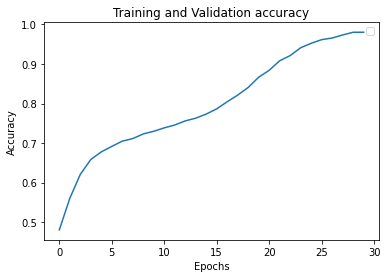

In [18]:
# Baseline Dataset with the best model

from random import seed
from random import randint
from numpy import array
from math import ceil
from math import log10
from math import sqrt
from numpy import argmax
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
 
# generate lists of integers and their sum/difference
def random_sum_pairs(n_examples, n_numbers, largest):
    X, y = list(), list()
    for i in range(n_examples):
        in_pattern = [randint(0,largest) for _ in range(n_numbers)]
        in_pattern_diff = in_pattern
        out_pattern_diff = in_pattern
        out_pattern_sum = sum(in_pattern)
        for first, second in zip(in_pattern_diff, in_pattern_diff[1:]):
            out_pattern_diff = first - second
        X.append(in_pattern)
        X.append(in_pattern_diff)
        y.append(out_pattern_sum)
        y.append(out_pattern_diff)
    return X, y
 
# convert data to strings
def to_string(X, y, n_numbers, largest):
    max_length = 5
    Xstr = list()
    for i in range(len(X)):
        if i%2 == 0:
            strp = '+'.join([str(n) for n in X[i]])
            strp = ''.join([' ' for _ in range(max_length-len(strp))]) + strp
            Xstr.append(strp)
        else :
            strp = '-'.join([str(n) for n in X[i]])
            strp = ''.join([' ' for _ in range(max_length-len(strp))]) + strp
            Xstr.append(strp)
    max_length = 4
    ystr = list()
    for pattern in y:
        strp = str(pattern)
        strp = ''.join([' ' for _ in range(max_length-len(strp))]) + strp
        ystr.append(strp)
    return Xstr, ystr
 

# integer encode strings
def integer_encode(X, y, alphabet):
	char_to_int = dict((c, i) for i, c in enumerate(alphabet))
	Xenc = list()
	for pattern in X:
		integer_encoded = [char_to_int[char] for char in pattern]
		Xenc.append(integer_encoded)
	yenc = list()
	for pattern in y:
		integer_encoded = [char_to_int[char] for char in pattern]
		yenc.append(integer_encoded)
	return Xenc, yenc
 
# one hot encode
def one_hot_encode(X, y, max_int):
	Xenc = list()
	for seq in X:
		pattern = list()
		for index in seq:
			vector = [0 for _ in range(max_int)]
			vector[index] = 1
			pattern.append(vector)
		Xenc.append(pattern)
	yenc = list()
	for seq in y:
		pattern = list()
		for index in seq:
			vector = [0 for _ in range(max_int)]
			vector[index] = 1
			pattern.append(vector)
		yenc.append(pattern)
	return Xenc, yenc
 
# generate an encoded dataset
def generate_data(n_samples, n_numbers, largest, alphabet):
	# generate pairs
	X, y = random_sum_pairs(n_samples, n_numbers, largest)
	# convert to strings
	X, y = to_string(X, y, n_numbers, largest)
	# integer encode
	X, y = integer_encode(X, y, alphabet)
	# one hot encode
	X, y = one_hot_encode(X, y, len(alphabet))
	# return as numpy arrays
	X, y = array(X), array(y)
	return X, y
 
# invert encoding
def invert(seq, alphabet):
	int_to_char = dict((i, c) for i, c in enumerate(alphabet))
	strings = list()
	for pattern in seq:
		string = int_to_char[argmax(pattern)]
		strings.append(string)
	return ''.join(strings)
 
# define dataset
seed(1)
n_samples = 10000
n_numbers = 2
largest = 99
alphabet = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '-', ' ']
n_chars = len(alphabet)
# define LSTM configuration
n_batch = 10
n_epoch = 30
# create LSTM
model = Sequential()
model.add(LSTM(64, input_shape=(5, 13), return_sequences=False))
model.add(RepeatVector(4))
model.add(LSTM(64, return_sequences=True))
model.add(Dense(13, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
# train LSTM
# for i in range(n_epoch):
# 	X, y = generate_data(n_samples, n_numbers, largest, alphabet)
# 	print(i)

X, y = generate_data(n_samples, n_numbers, largest, alphabet)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .70)

history_baseline = model.fit(X_train, y_train, epochs=n_epoch, batch_size=n_batch, validation_split=0.15)

# evaluate on some new patterns
X, y = generate_data(n_samples, n_numbers, largest, alphabet)
result = model.predict(X_test, batch_size=n_batch, verbose=0)

history_dict = history_baseline.history
print(history_dict.keys())


# summarize history for accuracy
loss_train = history_baseline.history['accuracy']
plt.plot(history_baseline.history['accuracy'])
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**(e) Reverse the query and answer strings in the data set.**

**(f) With the setting of the best test(valid) accuracy, draw the chart of valid accuracy vs. epoch for both non-reverse(baseline) and reverse data.**

Streaming output truncated to the last 5000 lines.
8-62 	 81  
36+63	 99  
36-63	 72- 
95+46	 321 
95-46	 5   
97+92	 801 
97-92	 05- 
6+29 	 89  
6-29 	 68  
14+33	 47  
14-33	 8-  
37+05	 321 
37-05	 32- 
91+49	 311 
91-49	 57  
34+38	 621 
34-38	 04  
75+24	 99  
75-24	 51- 
66+12	 78  
66-12	 54- 
85+21	 07  
85-21	 64- 
91+61	 53  
91-61	 3-  
94+0 	 94  
94-0 	 94- 
61+12	 73  
61-12	 5   
17+31	 48  
17-31	 85- 
62+18	 701 
62-18	 55  
41+08	 49  
41-08	 66  
99+7 	 601 
99-7 	 29- 
79+37	 071 
79-37	 42- 
82+26	 09  
82-26	 43  
05+96	 911 
05-96	 91  
44+19	 531 
44-19	 74  
11+73	 84  
11-73	 62  
74+82	 57  
74-82	 91- 
3+59 	 89  
3-59 	 29  
33+21	 54  
33-21	 12- 
73+53	 27  
73-53	 2-  
93+07	 901 
93-07	 13  
55+32	 87  
55-32	 23- 
26+88	 051 
26-88	 62  
84+14	 98  
84-14	 7-  
07+53	 501 
07-53	 53- 
15+89	 941 
15-89	 74  
35+62	 97  
35-62	 72- 
9+44 	 35  
9-44 	 53  
86+98	 751 
86-98	 12  
83+75	 59  
83-75	 91  
05+93	 98  
05-93	 11- 
09+44	 431 
09-44	 64- 
3

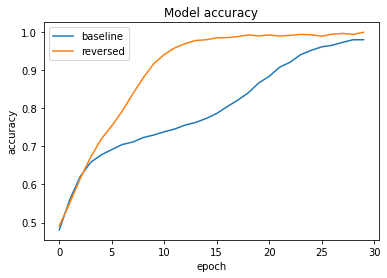

In [19]:
# Reverse the query and answer strings in the data set and plot the accuracy of both baseline and reversed with the best model.

from random import seed
from random import randint
from numpy import array
from math import ceil
from math import log10
from math import sqrt
from numpy import argmax
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
 
# generate lists of  integers and their sum/difference
def random_sum_pairs(n_examples, n_numbers, largest):
    X, y = list(), list()
    for i in range(n_examples):
        in_pattern = [randint(0,largest) for _ in range(n_numbers)]
        in_pattern_diff = in_pattern
        out_pattern_diff = in_pattern
        out_pattern_sum = sum(in_pattern)
        for first, second in zip(in_pattern_diff, in_pattern_diff[1:]):
            out_pattern_diff = first - second
        X.append(in_pattern)
        X.append(in_pattern_diff)
        y.append(out_pattern_sum)
        y.append(out_pattern_diff)
    return X, y
 
# convert data to strings
def to_string(X, y, n_numbers, largest):
    max_length = 5
    Xstr = list()
    for i in range(len(X)):
        if i%2 == 0:
            strp = '+'.join([str(n) for n in X[i]])
            strp = ''.join([' ' for _ in range(max_length-len(strp))]) + strp
            Xstr.append(strp)
        else :
            strp = '-'.join([str(n) for n in X[i]])
            strp = ''.join([' ' for _ in range(max_length-len(strp))]) + strp
            Xstr.append(strp)
    max_length = 4
    ystr = list()
    for pattern in y:
        strp = str(pattern)
        strp = ''.join([' ' for _ in range(max_length-len(strp))]) + strp
        ystr.append(strp)
    return Xstr, ystr
 

# integer encode strings
def integer_encode(X, y, alphabet):
	char_to_int = dict((c, i) for i, c in enumerate(alphabet))
	Xenc = list()
	for pattern in X:
		integer_encoded = [char_to_int[char] for char in pattern]
		Xenc.append(integer_encoded)
	yenc = list()
	for pattern in y:
		integer_encoded = [char_to_int[char] for char in pattern]
		yenc.append(integer_encoded)
	return Xenc, yenc
 
# one hot encode
def one_hot_encode(X, y, max_int):
	Xenc = list()
	for seq in X:
		pattern = list()
		for index in seq:
			vector = [0 for _ in range(max_int)]
			vector[index] = 1
			pattern.append(vector)
		Xenc.append(pattern)
	yenc = list()
	for seq in y:
		pattern = list()
		for index in seq:
			vector = [0 for _ in range(max_int)]
			vector[index] = 1
			pattern.append(vector)
		yenc.append(pattern)
	return Xenc, yenc
 
# generate an encoded dataset
def generate_data(n_samples, n_numbers, largest, alphabet):
  # generate pairs
  X, y = random_sum_pairs(n_samples, n_numbers, largest)
  # convert to strings
  X, y = to_string(X, y, n_numbers, largest)  

  # Reverse the query and result strings here.
  X = [i[::-1] for i in X]
  y = [j[::-1] for j in y]

  print("\n\n-------------Reversed string-----------")
  for k in range(len(X)):
    print(X[k] + '\t ' + y[k])

  # integer encode
  X, y = integer_encode(X, y, alphabet)
  # one hot encode
  X, y = one_hot_encode(X, y, len(alphabet))
  # return as numpy arrays
  X, y = array(X), array(y)
  return X, y
 
# invert encoding
def invert(seq, alphabet):
	int_to_char = dict((i, c) for i, c in enumerate(alphabet))
	strings = list()
	for pattern in seq:
		string = int_to_char[argmax(pattern)]
		strings.append(string)
	return ''.join(strings)
 
# define dataset
seed(1)
n_samples = 10000
n_numbers = 2
largest = 99
alphabet = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '-', ' ']
n_chars = len(alphabet)
# define LSTM configuration
n_batch = 10
n_epoch = 30
# create LSTM
model = Sequential()
model.add(LSTM(64, input_shape=(5, 13), return_sequences=False))
model.add(RepeatVector(4))
model.add(LSTM(64, return_sequences=True))
model.add(Dense(13, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
# train LSTM
# for i in range(n_epoch):
# 	X, y = generate_data(n_samples, n_numbers, largest, alphabet)
# 	print(i)

X, y = generate_data(n_samples, n_numbers, largest, alphabet)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .70)

history = model.fit(X_train, y_train, epochs=n_epoch, batch_size=n_batch, validation_split=0.15)

# evaluate on some new patterns
#X, y = generate_data(n_samples, n_numbers, largest, alphabet)
result = model.predict(X_test, batch_size=n_batch, verbose=0)


history_dict = history.history
print(history_dict.keys())

# summarize history for accuracy
plt.plot(history_baseline.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['baseline', 'reversed'], loc='upper left')
plt.show()



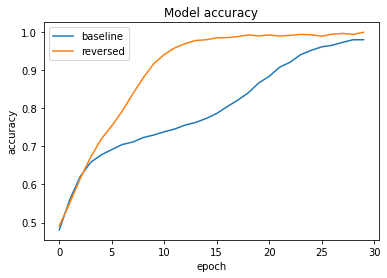

In [20]:
# summarize history for accuracy
plt.plot(history_baseline.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['baseline', 'reversed'], loc='upper left')
plt.show()

In [1]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.2 MB/s 
     |████████████████████████████████| 1.6 MB 34.7 MB/s 
